<a href="https://colab.research.google.com/github/Nawapat2541/Simulated_annealing/blob/main/Simulated_annealing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import inspect as ins
import numpy as np
import math as m
import matplotlib.pyplot as plt
import random as rand

In [2]:
def delta_c(func, a, b):
  return abs(func(a) - func(b))

In [3]:
objective_function = lambda x:  (x+3)*(x-2)**2*(x+1)**3

In [4]:
diff = delta_c(objective_function, 3, 5)
print(diff)

15168


old-present ratio is less than tolerace
round#0, value = -2.1428555184272318, function_value = -21.95976041978192
round#1, value = -3.0677132036665085, function_value = 15.37334320079847
round#2, value = -2.5722431559481658, function_value = -34.7547959159103
round#3, value = -2.7923361945538008, function_value = -27.46083811820875
round#4, value = -2.7380838626923705, function_value = -30.873077703698385
round#5, value = -2.7033787253222896, function_value = -32.430664984784386
round#6, value = -2.6740694599254837, function_value = -33.40687108875789
round#7, value = -2.6688815773779746, function_value = -33.54946686738211
round#8, value = -2.667365622602365, function_value = -33.589482000760576
round#9, value = -2.6653313258983147, function_value = -33.642015143357376
round#10, value = -2.6642628176384138, function_value = -33.66907615811937
round#11, value = -2.66426043570047, function_value = -33.669136075126985
round#12, value = -2.663795619379221, function_value = -33.68079373342

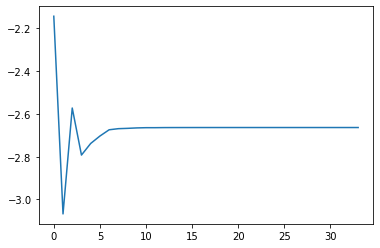

In [73]:
xlist, ylist = simulated_annealing(objective_function, -0.5, 4, 1250, tol=5e-11)
ylist = []
for index, value in enumerate(xlist):
    ylist.append(objective_function(value))
    print(f"round#{index}, value = {value}, function_value = {ylist[index]}")

plt.plot(xlist)

In [72]:
def simulated_annealing(input_function, x0=0, rand_range=10, kmax=1000, tol=1e-10):
  xlist = []
  ylist = []
  k=1
  xpresent = x0
  while(k<=kmax):
    xold = xpresent
      
    if k>=kmax/10 and k<kmax/2:
      rand_range =  rand_range - rand_range*0.2
    elif k<3*kmax/4:
      rand_range =  rand_range - rand_range*0.5
    elif k<9*kmax/10:
      rand_range =  rand_range - rand_range*0.8
    else:
      rand_range =  rand_range - rand_range*0.95
    
    if input_function(xpresent+0.01) < input_function(xpresent):
      rand_x = rand.uniform(xpresent, xpresent+rand_range)
    else:
      rand_x = rand.uniform(xpresent-rand_range, xpresent)

    if input_function(rand_x) <  input_function(xpresent):
      xpresent = rand_x
    elif prob_func(input_function, xold, xpresent) >= rand.random():
      xpresent = rand_x    

    xlist.append(xpresent)
    ylist.append(input_function(xpresent))
    k = k + 1

    # print(f"xold = {xold}, xpresent = {xpresent}")
    if(abs(xold-xpresent)/abs(xpresent) <= tol):
      print("old-present ratio is less than tolerace")
      break

    if(abs(input_function(xpresent)) <= tol):
      print("present func is less than tolerace")
      break
    
  return xlist, ylist

In [29]:
def prob_func(func, old, present):
  if delta_c(func, old, present) <= 0:
    return 1
  else:
    return m.e**(-delta_c(func, old, present)/present)

In [30]:
x1 = list(np.linspace(-3.5, 2.5, 100))
print(x1)
result = []
for i in x1:
  result.append(objective_function(i))

print(result)

[-3.5, -3.4393939393939394, -3.378787878787879, -3.3181818181818183, -3.257575757575758, -3.196969696969697, -3.1363636363636362, -3.0757575757575757, -3.015151515151515, -2.9545454545454546, -2.893939393939394, -2.833333333333333, -2.7727272727272725, -2.712121212121212, -2.6515151515151514, -2.590909090909091, -2.5303030303030303, -2.4696969696969697, -2.409090909090909, -2.3484848484848486, -2.287878787878788, -2.2272727272727275, -2.1666666666666665, -2.106060606060606, -2.0454545454545454, -1.9848484848484849, -1.9242424242424243, -1.8636363636363635, -1.803030303030303, -1.7424242424242424, -1.6818181818181817, -1.621212121212121, -1.5606060606060606, -1.5, -1.4393939393939394, -1.378787878787879, -1.3181818181818183, -1.2575757575757573, -1.1969696969696968, -1.1363636363636362, -1.0757575757575757, -1.0151515151515151, -0.9545454545454546, -0.893939393939394, -0.833333333333333, -0.7727272727272725, -0.7121212121212119, -0.6515151515151514, -0.5909090909090908, -0.5303030303030

[-2.1428555184272318, -3.0677132036665085, -2.5722431559481658, -2.7923361945538008, -2.7380838626923705, -2.7033787253222896, -2.6740694599254837, -2.6688815773779746, -2.667365622602365, -2.6653313258983147, -2.6642628176384138, -2.66426043570047, -2.663795619379221, -2.6636609447498105, -2.663621843355289, -2.6635742587429307, -2.6635475531196344, -2.6635347519206167, -2.663528353956992, -2.663527213215116, -2.663526267029998, -2.6635256272997516, -2.663525227729357, -2.6635251823654507, -2.663525141314585, -2.6635251206797355, -2.6635250975804237, -2.663525090224223, -2.6635250882510917, -2.6635250857210786, -2.66352508402237, -2.663525083207923, -2.663525082930996, -2.6635250828921637]
[-21.95976041978192, 15.37334320079847, -34.7547959159103, -27.46083811820875, -30.873077703698385, -32.430664984784386, -33.40687108875789, -33.54946686738211, -33.589482000760576, -33.642015143357376, -33.66907615811937, -33.669136075126985, -33.68079373342333, -33.68415850994507, -33.685134354772

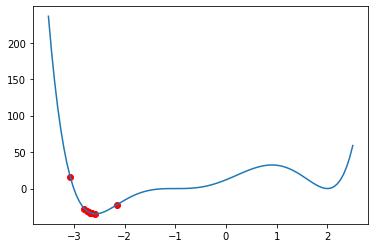

In [74]:
plt.scatter(xlist, ylist, c='r')
print(xlist)
print(ylist)
plt.plot(x1, result)